# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Syahel
- **Email:** muhammad.syahel11@gmail.com
- **ID Dicoding:** muhammad_syahel

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 "apakah suhu mempengaruhi penyewaan sepedah?"
- Pertanyaan 2 "di musim apa sepedah paling banyak di sewa dalam setahun?"
- Pertanyaan 3 "pada bulan apa sepeda paling banyak di sewa dalam setahun?"

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


## data Wrangling

### Gathering data

In [ ]:
day_df = pd.read_csv('Bike-Sharing-dataset/day.csv')
day_df.head()

### Assessing Data

In [ ]:
#cek duplikasi
print("banyak duplikasi :", day_df.duplicated().sum())

### Cleaning Data

In [ ]:
#mengubah tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.info()

In [ ]:
# Mengonversi data pada kolom kategori variabel berdasarkan kriteria 
# yang ditunjukkan pada file readme.txt

# Konversi nilai untuk kolom 'season' : 1:springer, 2:summer, 3:fall, 4:winter
day_df['season'].replace((1,2,3,4), ('springer','summer','fall','winter'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
day_df['yr'].replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df['weathersit'].replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df['weekday'].replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
day_df['workingday'].replace((0,1), ('No', 'Yes'), inplace=True)

day_df.head()

In [19]:
# Merubah nama kolom

day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

day_df.head(10)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,springer,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,2011,Jan,0,Thursday,Yes,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,2011,Jan,0,Friday,Yes,Misty,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,2011,Jan,0,Saturday,No,Misty,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,2011,Jan,0,Sunday,No,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,2011,Jan,0,Monday,Yes,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Exploratory Data Analysis (EDA)

### Explore ...

C:\Users\SAI\AppData\Local\Temp\ipykernel_18628\538564848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\SAI\AppData\Local\Temp\ipykernel_18628\538564848.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


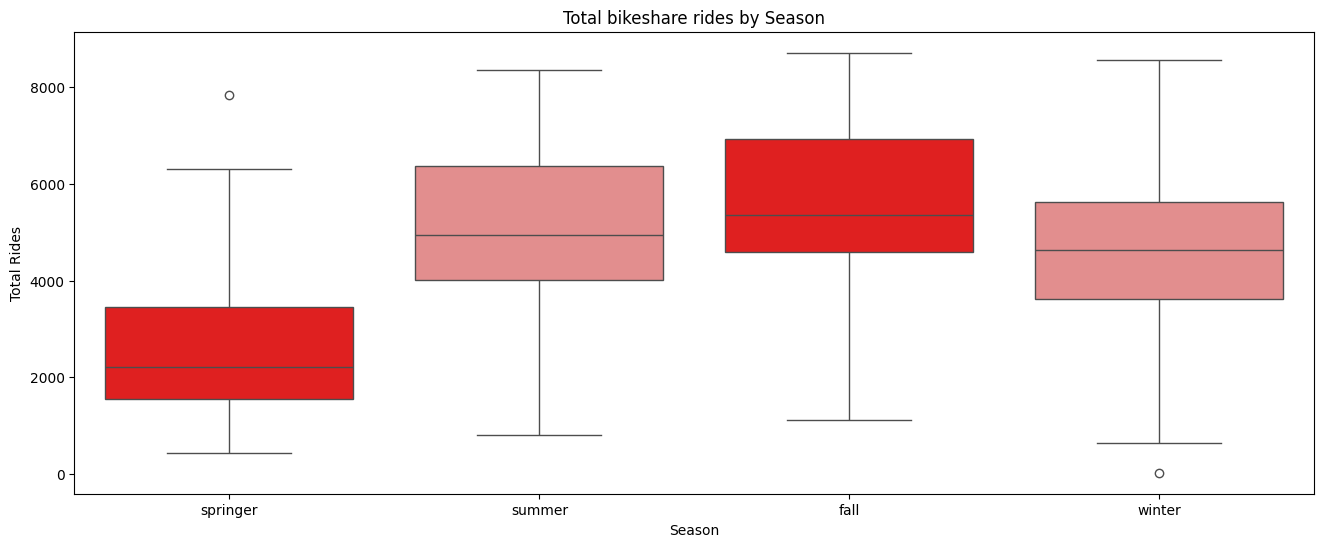

In [25]:
plt.figure(figsize=(16,6))

# Create a boxplot 
sns.boxplot(
    x="season",
    y="total_count",
    data=day_df,
    palette=["red", "lightcoral"]
)

# label dan title
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Season")


plt.show()

C:\Users\SAI\AppData\Local\Temp\ipykernel_18628\3177599618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\SAI\AppData\Local\Temp\ipykernel_18628\3177599618.py:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


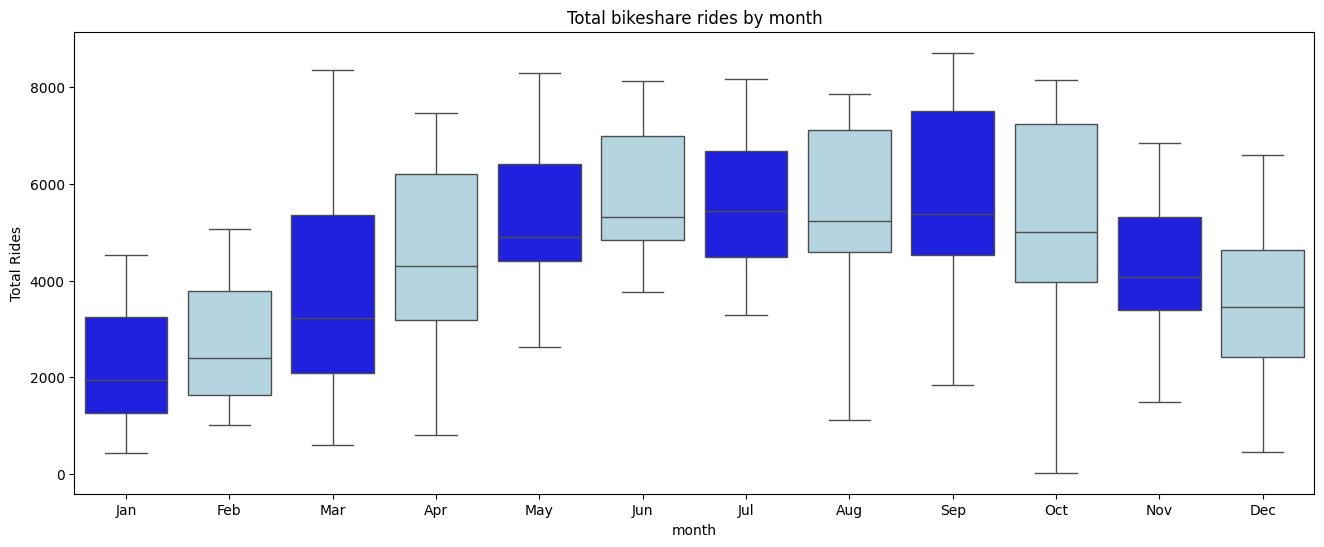

In [27]:
plt.figure(figsize=(16,6))

# Create a boxplot 
sns.boxplot(
    x="month",
    y="total_count",
    data=day_df,
    palette=["blue", "lightblue"]
)

# label dan title
plt.xlabel("month")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by month")


plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

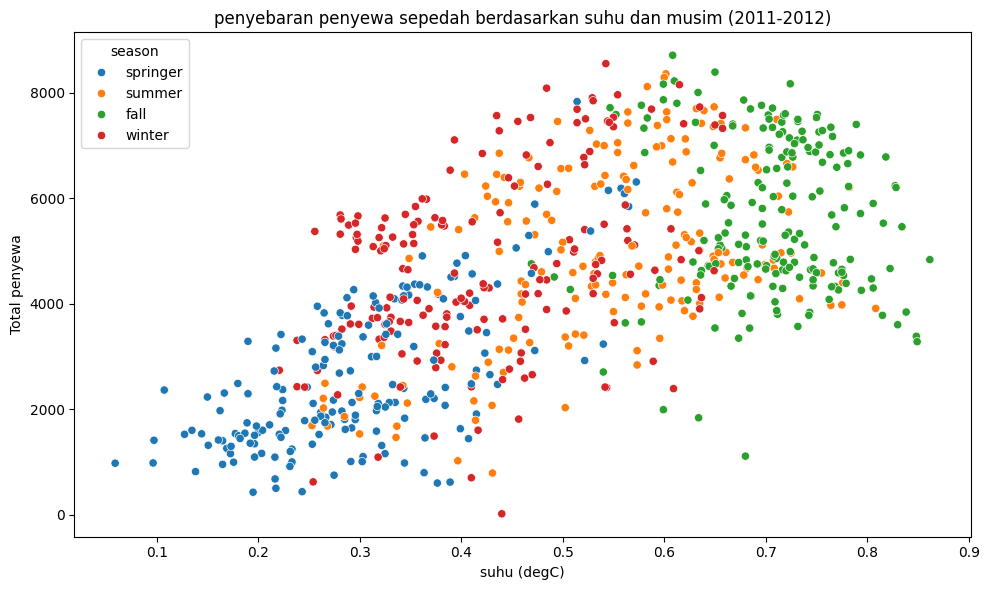

In [42]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='total_count', data=day_df, hue='season')

plt.xlabel("suhu (degC)")
plt.ylabel("Total penyewa")
plt.title("penyebaran penyewa sepedah berdasarkan suhu dan musim (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 2:

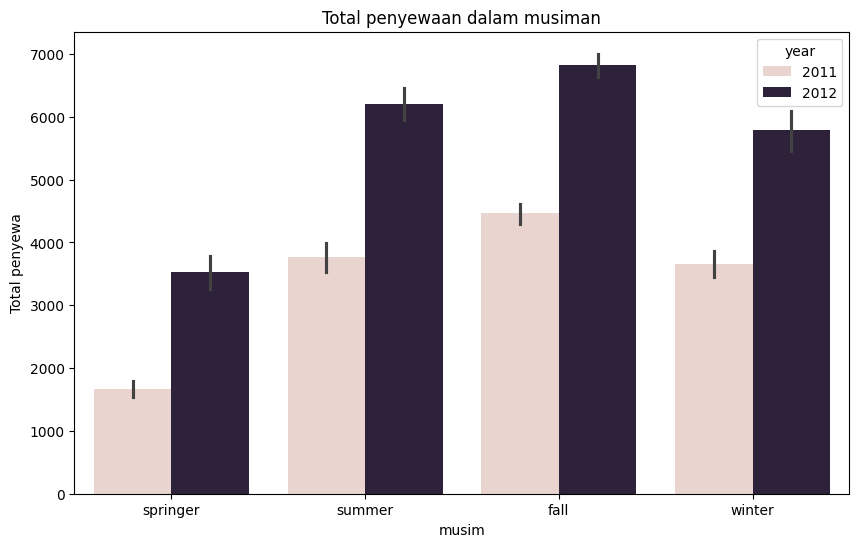

In [41]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=day_df, hue='year')

plt.xlabel("musim")
plt.ylabel("Total penyewa")
plt.title("Total penyewaan dalam musiman")

plt.show()

### Pertanyaan 3 :


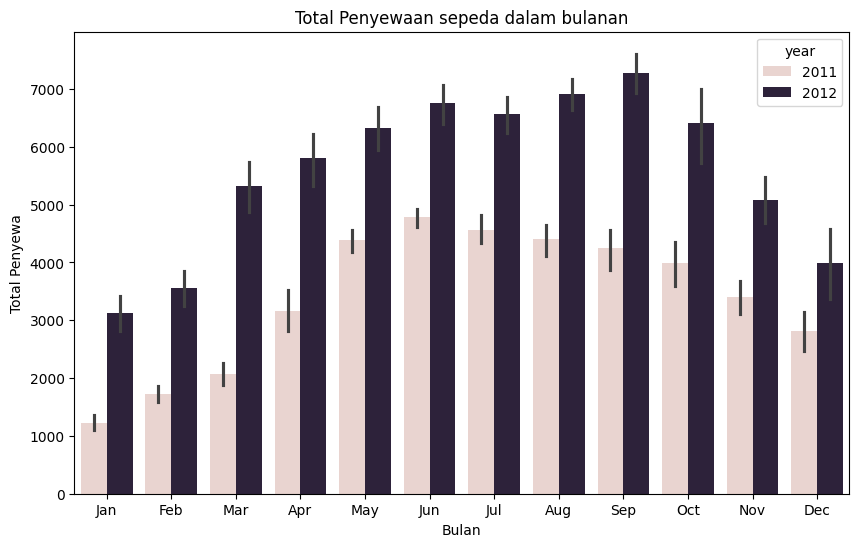

In [40]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='total_count', data=day_df, hue='year')

plt.xlabel("Bulan")
plt.ylabel("Total Penyewa")
plt.title("Total Penyewaan sepeda dalam bulanan")

plt.show()

## Conclusion

- Conclution pertanyaan 1 : terjadi hubungan antara suhu dengan penyewaan sepeda, dimana lebih banyak penyewa ketika suhu hangat. dan sebaliknya
- Conclution pertanyaan 2 : selama tahun 2011 dan 2012. musim summer dan fall adalah yang terbanyak untuk penyewaan sepeda
- Conclution pertanyaan 3 : dari bulan juni sampai semptember mengalami peningkatan dan puncaknya di bulan september untuk tahun 2012 dan bulan juni untuk tahun 2011

In [46]:
day_df.to_csv("data.csv", index=False)